dataaaa
    ones     Exam1     Exam2  Admetted
0     1  2.512662  2.132930 -0.173837
1     1  2.240620  0.597272 -0.173702
2     1  3.637684  1.419708 -0.173102
3     1  2.929833  1.091590 -0.172896
4     1 -0.079910  0.178613 -0.168814
5     1  3.574298  1.097398 -0.169415
cost
 [0.49319497 0.49179681 0.49061098 0.4896042  0.4887486  0.48802086
 0.48740139 0.48687369 0.48642389 0.48604025 0.48571287 0.48543336
 0.48519463 0.48499063 0.48481627 0.48466718 0.48453966 0.48443057
 0.48433722 0.48425733 0.48418893 0.48413037 0.48408023 0.48403728
 0.48400049 0.48396898 0.48394199 0.48391886 0.48389904 0.48388206
 0.4838675  0.48385503 0.48384434 0.48383517 0.48382732 0.48382059
 0.48381482 0.48380987 0.48380563 0.483802   0.48379888 0.48379621
 0.48379392 0.48379195 0.48379027 0.48378883 0.48378759 0.48378653
 0.48378562 0.48378484 0.48378417 0.4837836  0.4837831  0.48378268
 0.48378232 0.48378201 0.48378175 0.48378152 0.48378132 0.48378116
 0.48378101 0.48378089 0.48378078 0.48378069 0.48

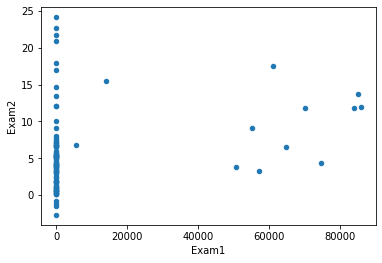

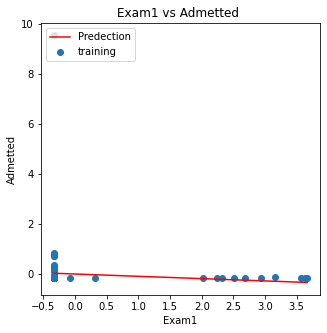

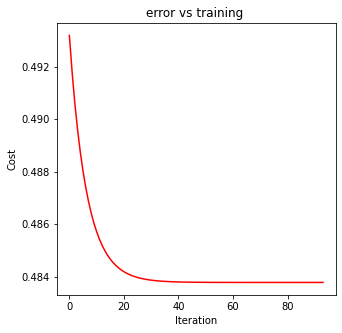

In [137]:
# importing the module
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

path = 'C:\\data.txt'

data= pd.read_csv(path, header=None, 
                  names=['Exam1','Exam2','Admetted']) 

# print("new data head\\_\ ",data.head(4))
# print("*****************")
# #data.descibe()

data.plot(kind='scatter',x='Exam1',y='Exam2')
#rescaling data 
data=(data - data.mean())/ data.std()

data.insert(0,'ones',1)
print('dataaaa\n',data.head(6))

#frame data 
# row =data.shape[0]

column =data.shape[1] #shape means nomber of rows 4 in our case

x = data.iloc[ :, 0 : column-1] #means get 0 and 1 from our shap
y=data.iloc[:,column-1:column] #means get from 1 to 2 

#convert from data frame to numpy matrices
y=np.matrix(y.values)
x=np.matrix(x.values)
theta = np.matrix(np.array([0,0,0]))# m=1* n=2
# print('x shaape',x.shape)
# thetavv=theta.T
# print('thetavvv shaape',thetavv.shape)

#cost function
def computeCost(X,y,theta):
    z=np.power(((X*theta.T)-y),2) # theta.T means Transpose 
    return np.sum(z)/(2*len(X))


#Gredient descent theta 1 and 0

def gradienDescent(x,y,theta,alpha,iters):
#     x=x.to_numpy()
    tmp=np.matrix(np.zeros(theta.shape)) #nb of rows
    
    parameters= int(theta.ravel().shape[1])
    
    ghaterCost = np.zeros(iters) #matrix in wich we stock iteration
    
    for i in range(iters):
        error=(x * theta.T) - y
        
        for j in range(parameters):
            term=np.multiply(error, x[:,j])
            tmp[0,j]=theta[0,j]-((alpha/len(x))*np.sum(term))
            
        theta=tmp
        ghaterCost[i]= computeCost(x,y,theta)
    return theta,ghaterCost


#initialize variables for learning rate and iterations
alpha=0.1
iters=94
#perform linear regression
g, cost= gradienDescent(x,y,theta,alpha,iters)


#best fit line

x=np.linspace(data.Exam1.min(),data.Exam1.max(),1000)

h= g[0,0]+(g[0,1]*x)


#draw the line 

fig,ax= plt.subplots(figsize=(5,5))
ax.plot(x,h,'r',label='Predection')
                                         
ax.scatter(data.Exam1,data.Admetted,label='training')
ax.legend(loc=2)
ax.set_xlabel('Exam1')
ax.set_ylabel('Admetted')
ax.set_title('Exam1 vs Admetted ')


#draw error graph 
fig,ax= plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('error vs training ')

print('cost\n',cost)
